# Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.

We generate a random secret floating number. Then we use hamming weight model to guess the number.

In [81]:
import pathlib
TEST_RESULT_DIR = './results'

pathlib.Path(TEST_RESULT_DIR).mkdir(parents=True, exist_ok=True) 

In [82]:
import numpy as np

mantissa_nbits = 12
guess_range=(-5.0, 5.0)
# the number of guess values in the guess range
secret_number = np.random.uniform(guess_range[0], guess_range[1]) 
secret_number = -0.5310286
print('secret_number =', secret_number)

secret_number = -0.5310286


## Receover the weight number in step-by-step

In [83]:
import sys
sys.path.append("../")

from pybatina.weight_recovery import *
from pybatina.utils import *

### Correlation of mantissa

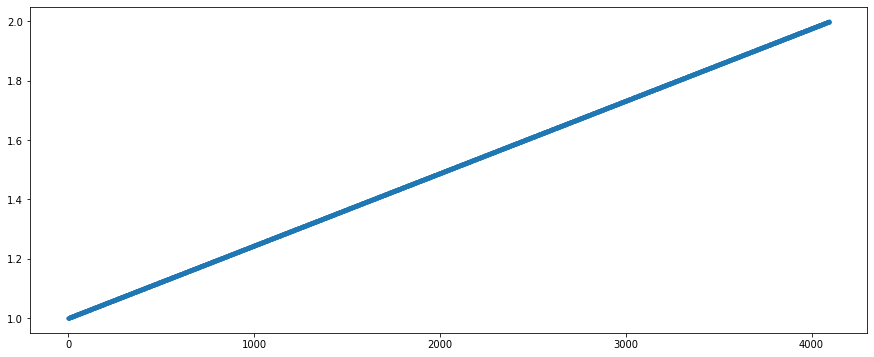

In [84]:
guess_numbers = build_guess_values(component='mantissa', mantissa_nbits=mantissa_nbits, guess_range=guess_range)
known_inputs = build_input_values(mantissa_nbits=mantissa_nbits, component='mantissa')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
pd.Series(known_inputs).sort_values().reset_index(drop=True).plot(figsize=(15,6), marker='.')

In [85]:
%%time
mantisa_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 11.6 s, sys: 312 ms, total: 11.9 s
Wall time: 11.9 s


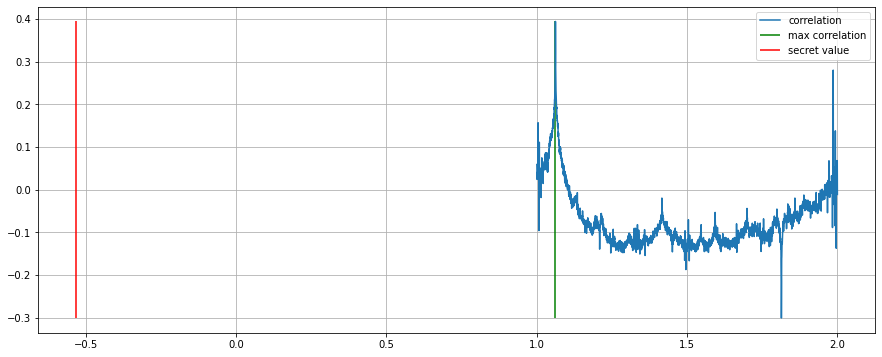

In [86]:
ax = mantisa_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_corr.idxmax(), mantisa_corr.min(), mantisa_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_corr.min(), mantisa_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [87]:
mantisa_corr.sort_values(ascending=False).iloc[:10]

1.062012    0.393877
1.062500    0.329720
1.062256    0.328723
1.061768    0.324187
1.061523    0.297304
1.062744    0.284942
1.985840    0.279767
1.061279    0.271910
1.061035    0.266193
1.062988    0.263394
dtype: float64

### Correlation exponent

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]


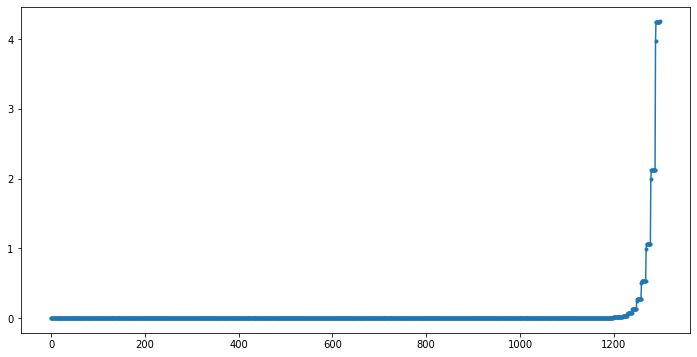

In [88]:
known_inputs = build_input_values(component='exponent')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
guess_numbers = build_guess_values(component='exponent', numbers=mantisa_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='.')

In [89]:
%%time
mantisa_exp_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 408 ms, sys: 0 ns, total: 408 ms
Wall time: 407 ms


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


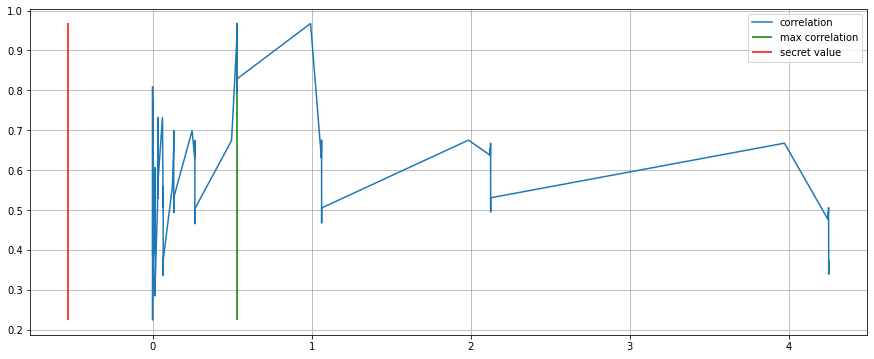

In [90]:
ax = mantisa_exp_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_exp_corr.idxmax(), mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [91]:
mantisa_exp_corr.sort_values(ascending=False).iloc[:10]

0.992920    0.967622
0.531128    0.967622
0.530640    0.953446
0.530884    0.953446
0.531006    0.953446
0.530518    0.935938
0.530762    0.935938
0.531494    0.828889
0.531372    0.828889
0.000015    0.809014
dtype: float64

### Correlation sign

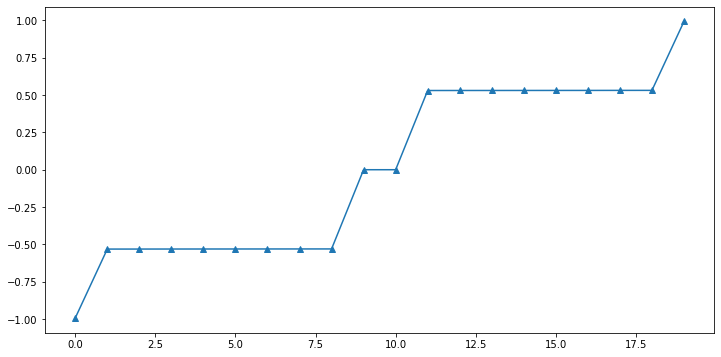

In [92]:
guess_numbers = build_guess_values(component='sign', numbers=mantisa_exp_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
known_inputs = build_input_values(component='sign')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='^')

In [93]:
%%time
full_number_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 14.2 ms, sys: 44 µs, total: 14.3 ms
Wall time: 14 ms


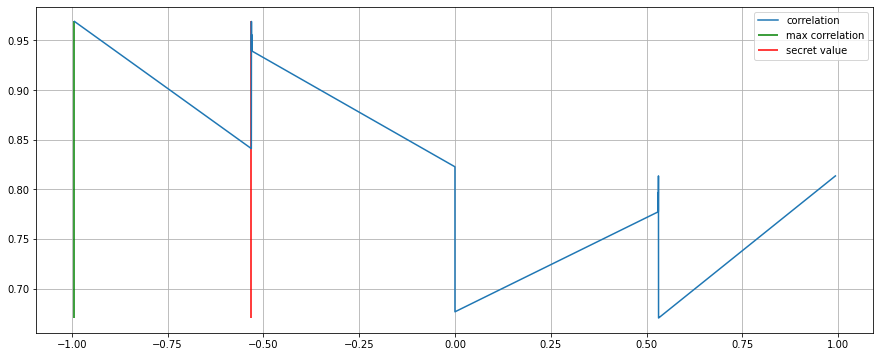

In [94]:
ax = full_number_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(full_number_corr.idxmax(), full_number_corr.min(), full_number_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [95]:
print('Secret value = %f' % secret_number)
full_number_corr.sort_values(ascending=False).iloc[:10]

Secret value = -0.531029


-0.531128    0.969117
-0.992920    0.969117
-0.531006    0.955811
-0.530884    0.955811
-0.530640    0.955811
-0.530762    0.939485
-0.530518    0.939485
-0.531494    0.841046
-0.531372    0.841046
-0.000015    0.822678
dtype: float64

## Recover a secret number with helper function

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 11.9 s, sys: 312 ms, total: 12.2 s
Wall time: 12.2 s


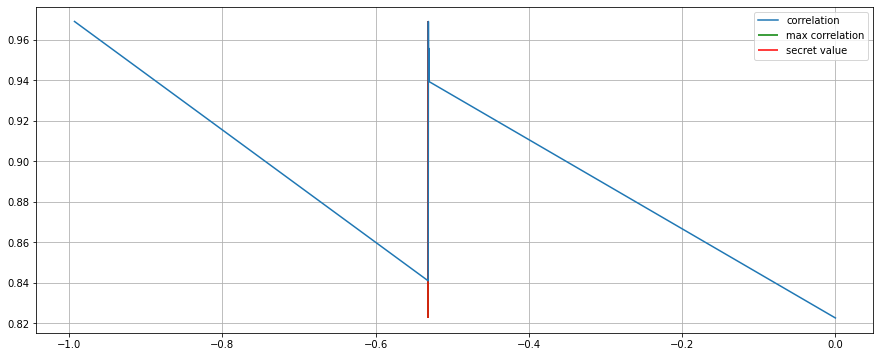

In [96]:
%%time
from weight_recovery_helper import *
full_number_corr = batina_recover_weight(secret_number=secret_number, 
                                         guess_range=guess_range,
                                         mantissa_nbits=mantissa_nbits,
                                         noise=None)
ax = full_number_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(full_number_corr.idxmax(), full_number_corr.min(), full_number_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [97]:
print('Secret value = %f' % secret_number)
full_number_corr.sort_values(ascending=False).iloc[:10]

Secret value = -0.531029


-0.992920    0.969117
-0.531128    0.969117
-0.530640    0.955811
-0.530884    0.955811
-0.531006    0.955811
-0.530518    0.939485
-0.530762    0.939485
-0.531372    0.841046
-0.531494    0.841046
-0.000015    0.822678
dtype: float64

## Recover multiple secret numbers

In [98]:
SECRET_VALUE='secret value'
GUESSED_VALUE = 'guessed value'
CORRELATION='correlation'
df_index = [SECRET_VALUE, GUESSED_VALUE, CORRELATION]

In [99]:
def add_noise_to_signal(signal, snr, freq):
    """
    add noise to the signal
    :param signal: signal
    :param snr: signal to noise ratio 
    :param freq: frequency of noise 
    :return: signal with noise
    """
    sig_max = signal.max()
    sig_min = signal.min()
    return pd.Series(signal).apply(lambda x: x  +
                                   np.average(np.random.normal(0.0, (sig_max-sig_min)/snr, freq)))

In [100]:
precision = 1e-3
n_secret_numbers = 1000
secret_numbers = np.concatenate((
    np.random.uniform(guess_range[0], guess_range[1], int(n_secret_numbers*2/4) ),
    np.random.uniform(guess_range[0]*3e-1, guess_range[1]*3e-1, int(n_secret_numbers*1/4)),
    np.random.uniform(guess_range[0]*1e-1, guess_range[1]*1e-1, int(n_secret_numbers*1/4))
))
np.random.shuffle(secret_numbers)
signal_to_noise_ratio = 0.5
print('secret_numbers.shape = %s' % (str(secret_numbers.shape)))

secret_numbers.shape = (1000,)


## Batina without noise

### load existing DB

In [ ]:
# read the existing data
from os import path
try:
    fname = path.join(TEST_RESULT_DIR, 'batina_results-%d.csv' % mantissa_nbits)
    last_df = pd.read_csv(fname, index_col=0)
    print('read results in %s' % fname)
    print('number of weight values', len(last_df[SECRET_VALUE].unique()))
except FileNotFoundError:
    last_df = pd.DataFrame()
    pass
batina_results = last_df

### main process

In [ ]:
%%time 
for value in secret_numbers:
    if value in batina_results[SECRET_VALUE].unique():
        continue
    s = batina_recover_weight(secret_number=value,
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits)
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    batina_results = pd.concat([batina_results, df], axis=0, ignore_index=True)

### merge and save DB

In [ ]:
print('number of weight values', len(batina_results[SECRET_VALUE].unique()))
batina_results.to_csv(fname)
print('save results in %s' % fname)

## Batina with noise

### load existing DB

In [ ]:
# read the existing data
from os import path
try:
    fname = path.join(TEST_RESULT_DIR, 'noise_batina_results-%d.csv' % mantissa_nbits)
    last_df = pd.read_csv(fname, index_col=0)
    print('read results in %s' % fname)
    print('number of weight values', len(last_df[SECRET_VALUE].unique()))
except FileNotFoundError:
    last_df = pd.DataFrame()
    pass
noise_batina_results = last_df

### main process

In [ ]:
%%time
# start guessing... - without noise
noise_batina_results = pd.DataFrame(dtype=np.float32, columns=df_index)
for value in secret_numbers:
    if value in noise_batina_results[SECRET_VALUE].unique():
        continue
    s = batina_recover_weight(secret_number=value, 
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits,
                              noise=(add_noise_to_signal, signal_to_noise_ratio, 200))
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    noise_batina_results = pd.concat([noise_batina_results, df], axis=0, ignore_index=True)

### merge and save DB

In [ ]:
print('number of weight values', len(noise_batina_results[SECRET_VALUE].unique()))
noise_batina_results.to_csv(fname)
print('save results in %s' % fname)

### Statistics

In [ ]:
ERROR = 'error'
def statistics(df):
    dft = df[[SECRET_VALUE, GUESSED_VALUE, CORRELATION]].astype(dtype=np.float64)
    dft[ERROR] = np.abs((dft[GUESSED_VALUE] - dft[SECRET_VALUE])/dft[SECRET_VALUE])    
    best_corr = dft.loc[dft.groupby(SECRET_VALUE)[CORRELATION].idxmax()]
    best_err = dft.loc[dft.groupby(SECRET_VALUE)[ERROR].idxmin()]
    return best_corr.T, best_err.T

In [ ]:
batina_best_corr, batina_best_err = statistics(batina_results)
noise_batina_best_corr, noise_batina_best_err = statistics(noise_batina_results)

In [ ]:
study_score = batina_best_corr
(study_score.T[ERROR] < 1e-3).value_counts()

In [ ]:
error_sorted = study_score.T.sort_values(ERROR, ascending=False)
error_sorted[:10]

In [ ]:
error_sorted.iloc[0][SECRET_VALUE]

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
ax[0].plot(guess_range, guess_range, linewidth=1, label='ideal', color='red')
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
ax[0].set_ylim(np.min(guess_range), np.max(guess_range))

ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr)')

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr)')

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr)')

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')
    a.set_xlim(np.min(guess_range), np.max(guess_range))

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'hw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
df = noise_batina_best_corr.T
ax[0].plot(guess_range, guess_range, linewidth=1, label='ideal', color='red')
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='with noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='with noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='with noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'nhw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()

## New implementation

In [111]:
import sys
sys.path.append("../")

from pybatina.weight_recovery import *
from pybatina.utils import *

import numpy as np
import pandas as pd

mantissa_three_bytes = [7, 8, 8]
max_mantissa_nbits = np.sum(mantissa_three_bytes)


def build_values(component, mantissa_byte_index):
    if component == 'mantissa':
        assert(mantissa_byte_index < len(mantissa_three_bytes))
        sum_nbits = np.sum(mantissa_three_bytes[:mantissa_byte_index + 1])
        values = np.left_shift(np.arange(0, 1 << mantissa_three_bytes[mantissa_byte_index]), max_mantissa_nbits - sum_nbits) | np.left_shift(127, max_mantissa_nbits)
        retval = np.concatenate((values, values | (1 << 31)))
    elif component == 'exponent':
        retval = np.left_shift(np.arange(0, 1 << 8), max_mantissa_nbits)
    else:
        raise ValueError('the component is not supported')
    return retval


def build_input_values(component, mantissa_byte_index=None):
    return np.vectorize(int_to_float)(build_values(component, mantissa_byte_index))


def build_guess_values(component, mantissa_byte_index=None, numbers=None):
    values = build_values(component, mantissa_byte_index)
    if numbers is not None:
        if component == 'mantissa':
            int_numbers = np.vectorize(float_to_int)(numbers)
        elif component == 'exponent':
            mask = ~(0xff << max_mantissa_nbits)
            int_numbers = np.vectorize(lambda x: float_to_int(x) & mask)(numbers)
        else:
            raise ValueError('the component is not supported')
        values = (values | int_numbers[:, np.newaxis]).reshape(-1)
    return np.vectorize(int_to_float)(values)


### Correlation of mantissa

In [130]:
%%time

numbers=None
for mantissa_byte_index in [2,1,0]:
    guess_numbers = build_guess_values(component='mantissa', mantissa_byte_index=mantissa_byte_index, numbers=numbers)
    known_inputs = build_input_values(component='mantissa', mantissa_byte_index=mantissa_byte_index)   
    secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
    mantisa_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)
    numbers = mantisa_corr.sort_values(ascending=False).index[:40]

CPU times: user 13.2 s, sys: 248 ms, total: 13.4 s
Wall time: 13.4 s


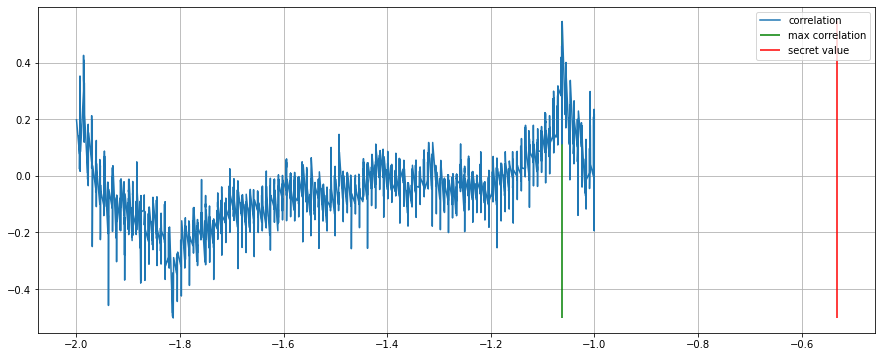

In [131]:
ax = mantisa_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_corr.idxmax(), mantisa_corr.min(), mantisa_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_corr.min(), mantisa_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [132]:
mantisa_corr.sort_values(ascending=False).iloc[:20]

-1.062179    0.546189
-1.062179    0.546189
-1.062179    0.546189
-1.062179    0.546189
-1.063186    0.459251
-1.063186    0.459251
-1.063186    0.459251
-1.063186    0.459251
-1.062698    0.431246
-1.062698    0.431246
-1.062698    0.431246
-1.062698    0.431246
-1.986038    0.426363
-1.986038    0.426363
-1.986038    0.426363
-1.986038    0.426363
-1.063186    0.426324
-1.063186    0.426324
-1.063186    0.426324
-1.063186    0.426324
dtype: float64

### Correlation exponent

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.


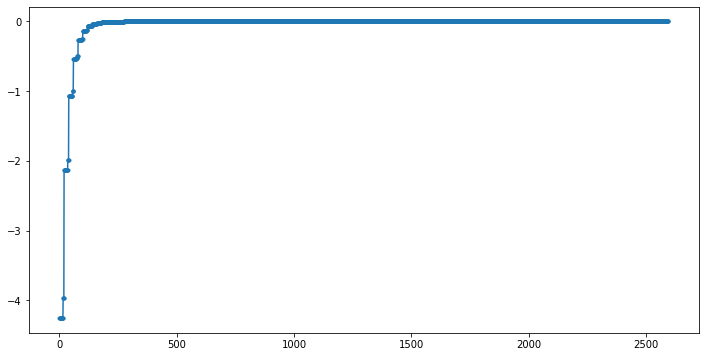

In [133]:
known_inputs = build_input_values(component='exponent')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
guess_numbers = build_guess_values(component='exponent', numbers=mantisa_corr.sort_values(ascending=False).iloc[:20].index)
guess_numbers = guess_numbers[np.where(np.logical_and(guess_numbers >= guess_range[0], guess_numbers <= guess_range[1]))]
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='.')

In [134]:
%%time
mantisa_exp_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 818 ms, sys: 12 ms, total: 830 ms
Wall time: 828 ms


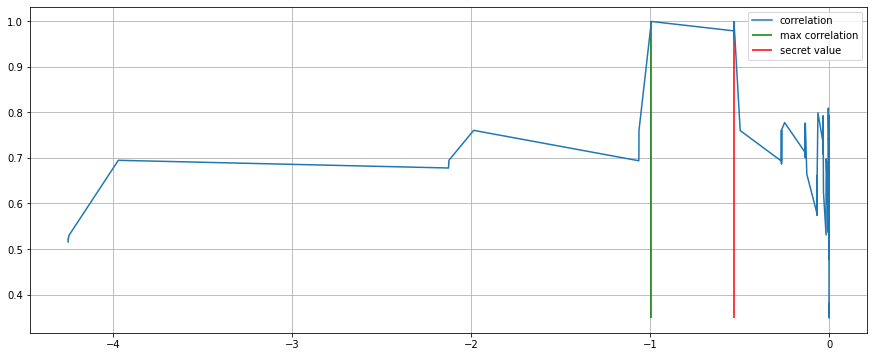

In [135]:
ax = mantisa_exp_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_exp_corr.idxmax(), mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [136]:
print('secret_number:', secret_number)
mantisa_exp_corr.sort_values(ascending=False).iloc[:20]

secret_number: -0.5310286


-0.993019    0.999410
-0.993019    0.999410
-0.993019    0.999410
-0.993019    0.999410
-0.531090    0.999001
-0.531090    0.999001
-0.531090    0.999001
-0.531090    0.999001
-0.531593    0.986062
-0.531593    0.986062
-0.531593    0.986062
-0.531593    0.986062
-0.531593    0.978762
-0.531593    0.978762
-0.531593    0.978762
-0.531593    0.978762
-0.531349    0.961958
-0.531349    0.961958
-0.531349    0.961958
-0.531349    0.961958
dtype: float64